1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


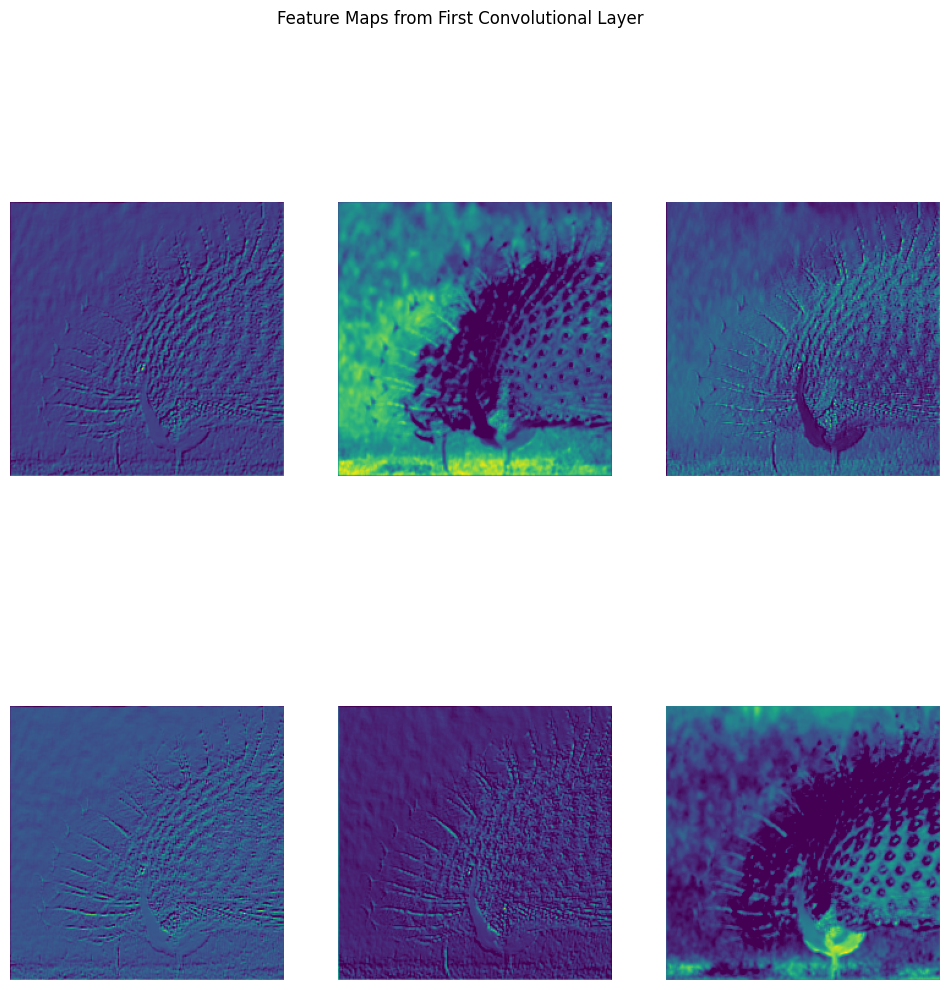

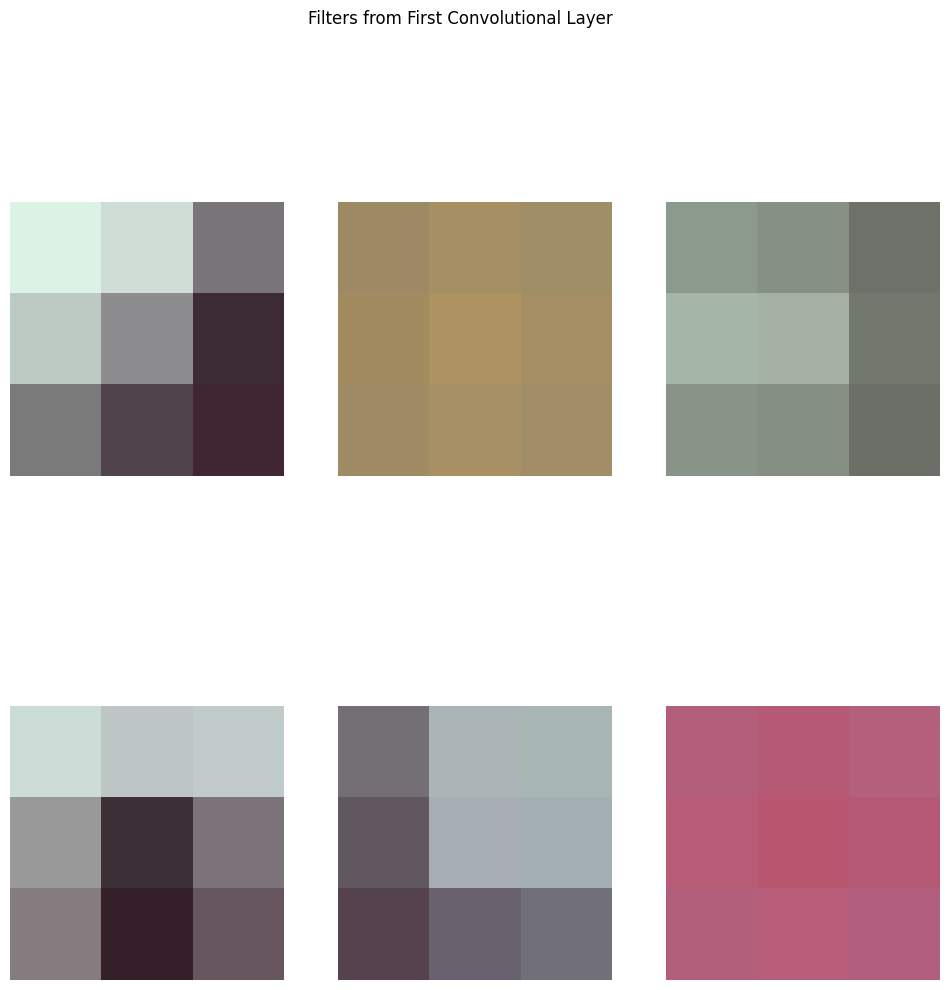

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image

# Load VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet', include_top=False)

# Load and preprocess an image
img_path = '4.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Scale to [0, 1]

# Get the output of the first convolutional layer
layer_outputs = model.layers[1].output
feature_map_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# Get feature maps
feature_maps = feature_map_model.predict(img_array)

# Visualize the first few feature maps
num_feature_maps = feature_maps.shape[-1]
plt.figure(figsize=(12, 12))
for i in range(min(6, num_feature_maps)):  # Display first 6 feature maps
    plt.subplot(2, 3, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Feature Maps from First Convolutional Layer')
plt.show()

# Get the weights of the first convolutional layer
filters, biases = model.layers[1].get_weights()

# Normalize filter values to 0-1 for better visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plot the filters
plt.figure(figsize=(12, 12))
for i in range(min(6, filters.shape[3])):  # Display first 6 filters
    plt.subplot(2, 3, i + 1)
    plt.imshow(filters[:, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filters from First Convolutional Layer')
plt.show()
